In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import FactorAnalysis

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("datasets/imputed_data_QS.csv")
numeric_data = data.drop(columns=['Rank', 'Institution Name', 'Country', 'Year','CS','CF','RI','Age','STA','Overall'])
numeric_data_standardized = (numeric_data - numeric_data.mean()) / numeric_data.std()

In [3]:
numeric_data_standardized.head()

,AR_SCORE,ER_SCORE,FS_SCORE,CPF_SCORE,IF_SCORE,IS_SCORE,IRN_SCORE,EO_SCORE,S_SCORE
0,3.108493,2.943028,2.318724,2.539520,1.904748,2.074957,1.353533,3.099285,1.934759
1,3.108493,2.943028,2.318724,2.521606,1.893150,1.331733,1.705885,3.133533,1.969930
2,3.108493,2.943028,2.258799,2.539520,1.803262,1.411137,1.701540,3.141402,1.956716
3,3.087647,2.362722,2.318724,2.543103,1.713374,1.855801,0.702925,1.847316,1.242020
4,3.108493,2.943028,2.318724,1.765606,1.829358,2.125775,1.741756,3.127000,1.706911


### Implementing PCA

In [4]:
pca = PCA()
pca.fit(numeric_data_standardized)

explained_variance_ratio = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

for i, var in enumerate(explained_variance_ratio, start=1):
    print(f"PC{i}: {var * 100:.2f}% variance explained")

PC1: 54.70% variance explained
PC2: 12.82% variance explained
PC3: 11.10% variance explained
PC4: 7.03% variance explained
PC5: 5.30% variance explained
PC6: 3.28% variance explained
PC7: 2.47% variance explained
PC8: 2.00% variance explained
PC9: 1.30% variance explained


### Factor Analysis

In [5]:
# KMO Test
scaler = StandardScaler()
df_scaled = scaler.fit_transform(numeric_data)

kmo_all,kmo_model=calculate_kmo(df_scaled)
kmo_model

0.8592016158894967

In [6]:
# Bartlett’s Test of Sphericity
chi2_val, p_val = calculate_bartlett_sphericity(numeric_data)

print(f"Bartlett's test of result:")
print(f"statistic = {chi2_val:.4f}")
print(p_val,"p-value")

Bartlett's test of result:
statistic = 57734.7098
0.0 p-value


In [7]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.fit(numeric_data_standardized)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([4.92318936, 1.15418598, 0.9987571 , 0.63263684, 0.47656703,
       0.29550325, 0.22199644, 0.18021209, 0.1169519 ])

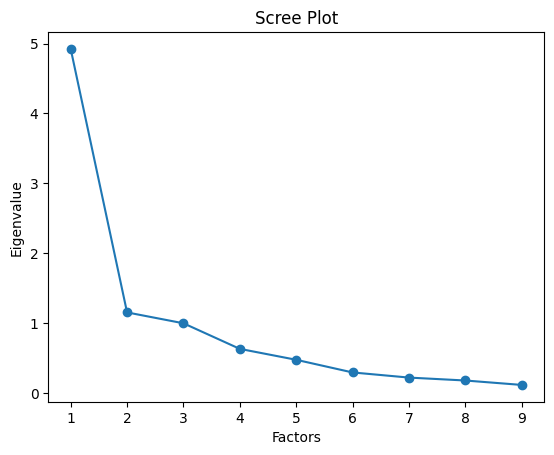

In [8]:
plt.scatter(range(1,df_scaled.shape[1]+1),eigen_values)
plt.plot(range(1,df_scaled.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.show()

In [9]:
fa = FactorAnalyzer(n_factors=4, rotation='varimax', method='principal')
fa.fit(numeric_data_standardized)

fa1 = FactorAnalyzer(n_factors=4, rotation=None, method='principal')
fa1.fit(numeric_data_standardized)

loadings = pd.DataFrame(
    fa.loadings_,
    index = numeric_data_standardized.columns,
    columns=['Factor1', 'Factor2','Factor3','Factor4']
)
print("Loading matrix：\n", loadings)

Loading matrix：
             Factor1   Factor2   Factor3   Factor4
AR_SCORE   0.819024  0.157225  0.162770  0.426118
ER_SCORE   0.898220  0.180730  0.119429  0.189647
FS_SCORE   0.195863  0.096632  0.974091  0.036301
CPF_SCORE  0.176879  0.195156 -0.012006  0.817817
IF_SCORE   0.171975  0.867040  0.027090  0.259892
IS_SCORE   0.186200  0.886917  0.109796  0.165268
IRN_SCORE  0.354303  0.182042  0.056601  0.804356
EO_SCORE   0.847834  0.177893  0.118084  0.285218
S_SCORE    0.511233  0.288090  0.096212  0.678798


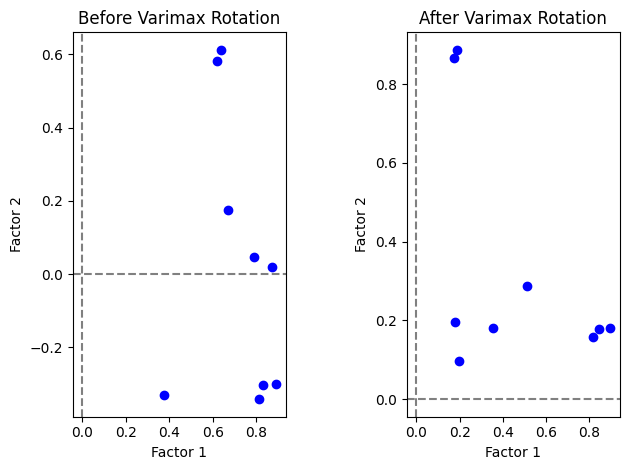

In [10]:
# Plot the difference of using rotation
plt.subplot(1, 2, 1)
plt.scatter(fa1.loadings_[:, 0], fa1.loadings_[:, 1], c='blue')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.title("Before Varimax Rotation")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")

plt.subplot(1, 2, 2)
plt.scatter(fa.loadings_[:, 0], fa.loadings_[:, 1], c='blue')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.title("After Varimax Rotation")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")

plt.tight_layout(w_pad=5.0, h_pad=2.0)
plt.show()

Factor 1: 1,2,8  AR_SCORE, ER_SCORE, EO_SCORE

Factor 2: 5,6  IF_SCORE, IS_SCORE

Factor 3: 3  FS_SCORE

Factor 4: 4,7,9  CPF_SCORE, IRN_SCORE , S_SCORE

In [11]:
cum_explained_variance_ratio = fa.get_factor_variance()
for i, var in enumerate(cum_explained_variance_ratio[2], start=1):
    print(f"Factor{i}: {var * 100:.2f}% culmulative variance explained")

Factor1: 30.19% culmulative variance explained
Factor2: 50.09% culmulative variance explained
Factor3: 61.52% culmulative variance explained
Factor4: 85.65% culmulative variance explained


In [12]:
fa.get_communalities()

array([0.90359026, 0.88969218, 0.99787159, 0.73834137, 0.84961049,
       0.86066066, 0.80886221, 0.84576144, 0.81437909])

### Calculate FA_Score

In [22]:
FA_Score = fa.fit_transform(numeric_data_standardized)
FA_Score = pd.DataFrame(FA_Score, columns=['FA_1', 'FA_2','FA_3','FA_4'])
FA_Score_standardized = (FA_Score - FA_Score.min()) / (FA_Score.max() - FA_Score.min())
FA_Score_standardized.head()

,FA_1,FA_2,FA_3,FA_4
0,0.757446,0.652191,0.756823,0.668983
1,0.759865,0.543975,0.759426,0.723164
2,0.761718,0.543666,0.746348,0.722349
3,0.644430,0.634360,0.798451,0.646954
4,0.782375,0.655572,0.758556,0.608074


### Calculate PCA_Score

In [23]:
col_factor1 = ['AR_SCORE', 'ER_SCORE', 'EO_SCORE']
col_factor2 = ['IF_SCORE', 'IS_SCORE']
col_factor3 = ['FS_SCORE']
col_factor4 = ['CPF_SCORE', 'IRN_SCORE', 'S_SCORE']
factor1 = numeric_data_standardized[col_factor1]
factor2 = numeric_data_standardized[col_factor2]
factor3 = numeric_data_standardized[col_factor3]
factor4 = numeric_data_standardized[col_factor4]

In [24]:
# PCA for each factor
factor_num = loadings.shape[1]
explained_variance_ratio = np.zeros(factor_num)

pca = PCA(n_components = 1)
pca_scores1 = pca.fit_transform(factor1)
explained_variance_ratio[0] = pca.explained_variance_ratio_[0]
pca_scores2 = pca.fit_transform(factor2)
explained_variance_ratio[1] = pca.explained_variance_ratio_[0]
pca_scores3 = pca.fit_transform(factor3)
explained_variance_ratio[2] = pca.explained_variance_ratio_[0]
pca_scores4 = pca.fit_transform(factor4)
explained_variance_ratio[3] = pca.explained_variance_ratio_[0]

In [25]:
for i, var in enumerate(explained_variance_ratio, start=1):
    print(f"Factor {i}: {var * 100:.2f}% variance explained")

Factor 1: 87.42% variance explained
Factor 2: 85.17% variance explained
Factor 3: 100.00% variance explained
Factor 4: 76.67% variance explained


In [30]:
PCA_Score = np.column_stack((pca_scores1, pca_scores2, pca_scores3, pca_scores4))
PCA_Score = pd.DataFrame(PCA_Score, columns=['pca_1', 'pca_2','pca_3','pca_4'])
PCA_Score_standardized = (PCA_Score - PCA_Score.min()) / (PCA_Score.max() - PCA_Score.min())
PCA_Score_standardized.head()

,pca_1,pca_2,pca_3,pca_4
0,0.994436,0.979397,1.000000,0.937564
1,0.997196,0.853847,1.000000,0.974918
2,0.997830,0.852103,0.982811,0.974736
3,0.844276,0.911113,1.000000,0.802940
4,0.996669,0.975310,1.000000,0.885368


In [32]:
model_score = pd.concat([data[['Institution Name','Country','Year']],FA_Score_standardized, PCA_Score_standardized],axis = 1)
model_score.to_csv('datasets\model_score.csv',index = False)
model_score.head()

,Institution Name,Country,Year,FA_1,FA_2,FA_3,FA_4,pca_1,pca_2,pca_3,pca_4
0,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,2018,0.757446,0.652191,0.756823,0.668983,0.994436,0.979397,1.000000,0.937564
1,STANFORD UNIVERSITY,United States,2018,0.759865,0.543975,0.759426,0.723164,0.997196,0.853847,1.000000,0.974918
2,HARVARD UNIVERSITY,United States,2018,0.761718,0.543666,0.746348,0.722349,0.997830,0.852103,0.982811,0.974736
3,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,2018,0.644430,0.634360,0.798451,0.646954,0.844276,0.911113,1.000000,0.802940
4,UNIVERSITY OF CAMBRIDGE,United Kingdom,2018,0.782375,0.655572,0.758556,0.608074,0.996669,0.975310,1.000000,0.885368
